In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
%run dataset_gc.ipynb

DATASET LOADED
EnterpriseModelDatasetGC(110)


Processing...
Done!


In [49]:
torch.manual_seed(42)
dataset = dataset_gc.shuffle()

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
dataset[0]


Dataset: EnterpriseModelDatasetGC(110):
Number of graphs: 110
Number of features: 1
Number of classes: 9


Data(x=[26, 1], edge_index=[2, 25], edge_attr=[25, 1], y=7)

In [50]:
torch.manual_seed(42)

balanced = False

while not balanced:
    dataset = dataset.shuffle()
    train_dataset = dataset[:int(len(dataset) * 0.65)]
    test_dataset = dataset[int(len(dataset) * 0.65):]
    
    train_ys = [0 for i in range(0,len(model_classes))]
    test_ys =[0 for i in range(0,len(model_classes))]

    for train_g in train_dataset:
        y = train_g.y[0].item()
        train_ys[y] += 1


    for test_g in test_dataset:
        y = test_g.y[0].item()
        test_ys[y] += 1
        
    if(0 not in train_ys and 1 not in train_ys and 0 not in test_ys and 1 not in test_ys):
        balanced = True


print(train_ys)
print(test_ys)
print("Datasets balanced!")

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

TypeError: 'int' object is not subscriptable

In [51]:
from torch_geometric.loader import DataLoader

NUM_GRAPHS_PER_BATCH = 8
NUM_HIDDEN_CHANNELS = 64

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=False)

In [52]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GraphConv, SAGEConv, GATConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(42)
        self.conv1 = SAGEConv(dataset.num_node_features, 2 * hidden_channels)
        self.conv2 = SAGEConv(2 * hidden_channels, 4 *  hidden_channels)
        self.conv3 = SAGEConv(4 * hidden_channels, 2 * hidden_channels)
        self.lin1 = Linear(2 * hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin1(x)
        x = self.lin2(x)
        return x


GCN(
  (conv1): SAGEConv(1, 128)
  (conv2): SAGEConv(128, 256)
  (conv3): SAGEConv(256, 128)
  (lin1): Linear(in_features=128, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=9, bias=True)
)
Number of parameters:  140681
Epoch: 001, Loss: 4.2742, Train Acc: 0.0704, Test Acc: 0.0513
Epoch: 002, Loss: 17.9568, Train Acc: 0.3803, Test Acc: 0.4103
Epoch: 003, Loss: 31.4196, Train Acc: 0.3803, Test Acc: 0.4103
Epoch: 004, Loss: 4.9069, Train Acc: 0.0845, Test Acc: 0.1026
Epoch: 005, Loss: 11.2480, Train Acc: 0.0845, Test Acc: 0.1026
Epoch: 006, Loss: 15.8910, Train Acc: 0.1127, Test Acc: 0.0769
Epoch: 007, Loss: 4.2704, Train Acc: 0.1127, Test Acc: 0.0769
Epoch: 008, Loss: 2.5605, Train Acc: 0.2817, Test Acc: 0.4103
Epoch: 009, Loss: 2.2982, Train Acc: 0.3662, Test Acc: 0.4103
Epoch: 010, Loss: 2.1426, Train Acc: 0.3803, Test Acc: 0.4103
Epoch: 011, Loss: 1.7395, Train Acc: 0.3803, Test Acc: 0.4103
Epoch: 012, Loss: 2.5205, Train Acc: 0.3803, Test Acc: 0.4103
Epoch

Epoch: 131, Loss: 0.6665, Train Acc: 0.5493, Test Acc: 0.6154
Epoch: 132, Loss: 1.7744, Train Acc: 0.5775, Test Acc: 0.6154
Epoch: 133, Loss: 1.2761, Train Acc: 0.6197, Test Acc: 0.6154
Epoch: 134, Loss: 0.6647, Train Acc: 0.6338, Test Acc: 0.6410
Epoch: 135, Loss: 1.2353, Train Acc: 0.6197, Test Acc: 0.5897
Epoch: 136, Loss: 1.1942, Train Acc: 0.6056, Test Acc: 0.5897
Epoch: 137, Loss: 1.2810, Train Acc: 0.5634, Test Acc: 0.5897
Epoch: 138, Loss: 1.2491, Train Acc: 0.5775, Test Acc: 0.5897
Epoch: 139, Loss: 0.9248, Train Acc: 0.5634, Test Acc: 0.5641
Epoch: 140, Loss: 1.0518, Train Acc: 0.5775, Test Acc: 0.6154
Epoch: 141, Loss: 0.8382, Train Acc: 0.6056, Test Acc: 0.6410
Epoch: 142, Loss: 1.6259, Train Acc: 0.5915, Test Acc: 0.6667
Epoch: 143, Loss: 1.2415, Train Acc: 0.5775, Test Acc: 0.6667
Epoch: 144, Loss: 1.1099, Train Acc: 0.5775, Test Acc: 0.6667
Epoch: 145, Loss: 1.2501, Train Acc: 0.5915, Test Acc: 0.6410
Epoch: 146, Loss: 0.4863, Train Acc: 0.5915, Test Acc: 0.6410
Epoch: 1

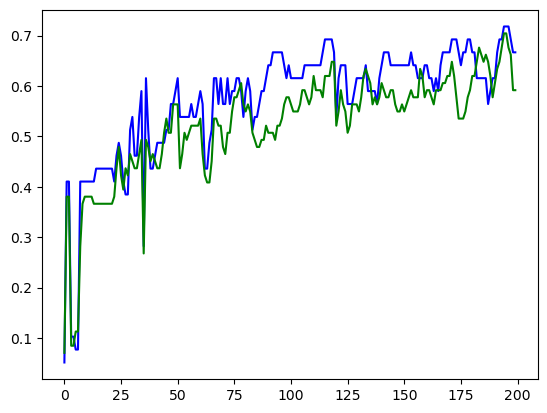

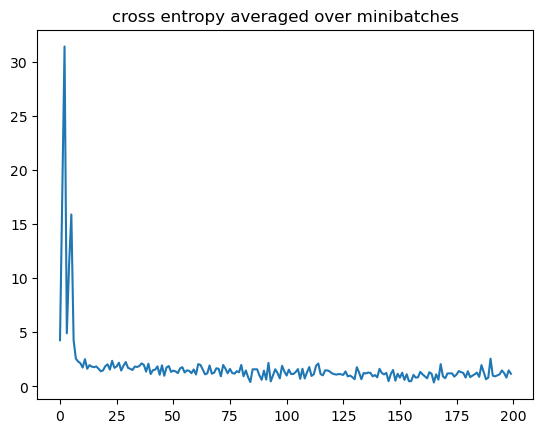

In [55]:
model = GCN(hidden_channels=NUM_HIDDEN_CHANNELS)
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss

def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        out = model(data.x, data.edge_index, data.batch)  
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())
    return correct / len(loader.dataset)

loss_values = []
train_acc_values = []
acc_values = []

for epoch in range(1, 201):
    loss = train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
        
    loss_values.append(loss)
    acc_values.append(test_acc)
    train_acc_values.append(train_acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    if(test_acc > 0.81):
        break

plt.plot(acc_values, 'b', train_acc_values, 'g')
plt.show()

losses = [loss_values[i].item() for i in range(0, len(loss_values))]
plt.title('cross entropy averaged over minibatches')
plt.plot(losses)
plt.show()

In [29]:
torch.save(model, 'models/model_gc.pth')

In [24]:
loaded_model = torch.load('../models/model_gc.pth')

In [25]:
loaded_model.eval()

GCN(
  (conv1): SAGEConv(1, 32)
  (conv2): SAGEConv(32, 64)
  (conv3): SAGEConv(64, 32)
  (lin1): Linear(in_features=32, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=10, bias=True)
)

In [30]:
def test_loaded(loader):
    loaded_model.eval()
    correct = 0
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = loaded_model(data.x, data.edge_index, data.batch)  
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.

test_acc = test_loaded(test_loader)
print(f'Test Acc: {test_acc:.4f}')

Test Acc: 0.3111


In [28]:
dataset[0].y

7

In [29]:
torch.manual_seed(42)
dataset = dataset_gc.shuffle()

train_dataset = dataset[:int(len(dataset) * 0.75)]
test_dataset = dataset[int(len(dataset) * 0.75):]

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')
print(dataset[0])

Number of graphs total: 110
Number of training graphs: 82
Number of test graphs: 28
Data(x=[26, 1], edge_index=[2, 25], edge_attr=[25, 1], y=7)


In [30]:
from torch_geometric.loader import DataLoader

NUM_GRAPHS_PER_BATCH = 8
NUM_HIDDEN_CHANNELS = 64

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=False)

In [46]:
class GATGNN2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GATConv(dataset.num_node_features, NUM_HIDDEN_CHANNELS, heads=4, edge_dim=1)
        self.lin1 = torch.nn.Linear(dataset.num_node_features, 4 * NUM_HIDDEN_CHANNELS)
        
        self.conv2 = GATConv(4 * NUM_HIDDEN_CHANNELS, NUM_HIDDEN_CHANNELS, heads=4, edge_dim=1)
        self.lin2 = torch.nn.Linear(4 * NUM_HIDDEN_CHANNELS, 4 * NUM_HIDDEN_CHANNELS)
        
        self.conv3 = GATConv(4 * NUM_HIDDEN_CHANNELS, 4 * NUM_HIDDEN_CHANNELS, heads=6, concat=False, edge_dim=1)
        self.lin3 = torch.nn.Linear(4 * NUM_HIDDEN_CHANNELS, dataset.num_classes)

        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = F.elu(self.conv1(x, edge_index, edge_attr) + self.lin1(x))
        x = F.elu(self.conv2(x, edge_index, edge_attr) + self.lin2(x))
        x = self.conv3(x, edge_index, edge_attr)
        
        x = global_mean_pool(x, data.batch)
        x = self.lin3(x)
        
        return F.log_softmax(x, dim=1)
        #print(x.argmax(dim=1).shape)
        #return x

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GATGNN2().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GATGNN2(
  (conv1): GATConv(1, 64, heads=4)
  (lin1): Linear(in_features=1, out_features=256, bias=True)
  (conv2): GATConv(256, 64, heads=4)
  (lin2): Linear(in_features=256, out_features=256, bias=True)
  (conv3): GATConv(256, 256, heads=6)
  (lin3): Linear(in_features=256, out_features=9, bias=True)
)
Number of parameters:  536585


In [43]:
def train():
    model.train()

    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out, data.y)
        total_loss += loss.item() * data.num_graphs
        loss.backward()
        optimizer.step()
    return total_loss / len(train_loader.dataset)

In [44]:
@torch.no_grad()
def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        out = model(data)  
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())
    return correct / len(loader.dataset)

Epoch: 001, Loss: 36.6658, Acc: 0.4286,
Epoch: 002, Loss: 7.1288, Acc: 0.4286,
Epoch: 003, Loss: 5.0190, Acc: 0.5000,
Epoch: 004, Loss: 2.7528, Acc: 0.5357,
Epoch: 005, Loss: 2.9830, Acc: 0.4643,
Epoch: 006, Loss: 2.2775, Acc: 0.3929,
Epoch: 007, Loss: 1.7481, Acc: 0.5000,
Epoch: 008, Loss: 1.7489, Acc: 0.3214,
Epoch: 009, Loss: 2.5392, Acc: 0.4643,
Epoch: 010, Loss: 2.0423, Acc: 0.3571,
Epoch: 011, Loss: 1.7479, Acc: 0.5000,
Epoch: 012, Loss: 1.5337, Acc: 0.5000,
Epoch: 013, Loss: 1.5667, Acc: 0.4286,
Epoch: 014, Loss: 1.6346, Acc: 0.4286,
Epoch: 015, Loss: 1.5740, Acc: 0.4643,
Epoch: 016, Loss: 1.5283, Acc: 0.3214,
Epoch: 017, Loss: 1.7834, Acc: 0.4286,
Epoch: 018, Loss: 1.4326, Acc: 0.1429,
Epoch: 019, Loss: 1.8445, Acc: 0.4286,
Epoch: 020, Loss: 1.7499, Acc: 0.4286,
Epoch: 021, Loss: 1.5234, Acc: 0.0714,
Epoch: 022, Loss: 1.6953, Acc: 0.4286,
Epoch: 023, Loss: 1.5833, Acc: 0.3214,
Epoch: 024, Loss: 1.2531, Acc: 0.1429,
Epoch: 025, Loss: 1.8633, Acc: 0.3214,
Epoch: 026, Loss: 2.1917

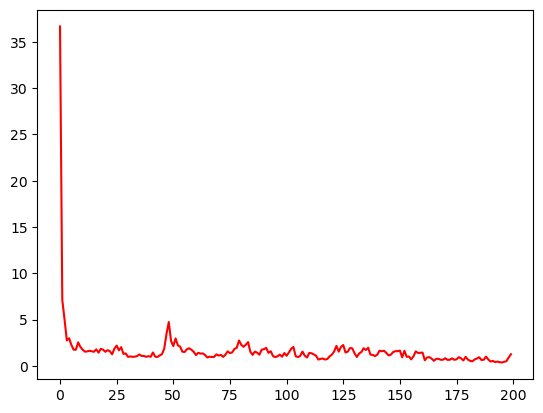

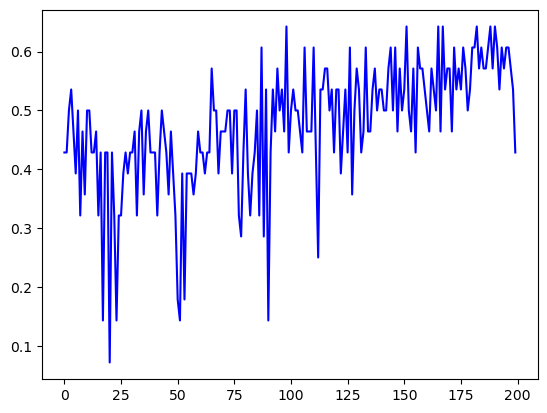

In [48]:
loss_values = []
acc_values = []

for epoch in range(1, 201):
    loss = train()
    acc = test(test_loader)
    
    loss_values.append(loss)
    acc_values.append(acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, 'f'Acc: {acc:.4f},')
    

plt.plot(loss_values, 'r',)
plt.show()
plt.plot(acc_values, 'b',)
plt.show()